<h1>Machine Learning A to Z with KNN</h1>

# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, load_iris, load_breast_cancer, load_digits
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, classification_report,precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import  train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

# scikit-learn
* https://scikit-learn.org
* 파이썬으로 구현한 가장 유명한 ML  라이브러리
* 2007년 Google Summer Code 에서 처음 구현
* 설치 : pip install scikit-learn
* 통일된 인터페이스로 일관성 있는 사용성 제공
  * Estimator
    * fit()
    * predict()
  * Preprocessor
    * fit()
    * transform()
* 다양한 머신러닝 알고리즘 구현
* 모델 선택 : 그리드 서치, 교차 검증, 메트릭스
* 다양한 머신러닝 관련 기능
* 정제된 데이터 세트 제공


# Estimator Interface
* `sklearn.base.BaseEstimator()` :
  * 모델의 기반 클래스모든 머신러닝 모델(Estimator)은 반드시 상속 구현
  * 학습/훈련, 예측 , 평가/검정 방법 인터페이스 일관성 제공
  * 구현 클래스는 개별 알고리즘으로 구현 제공
  * `set_params(**params)`
  * `get_params(deep=True)`
  * `fit(X, y)`
    * 모델 학습/훈련
  * `y_pred = predict(X)`
    * 예측 값 반환
  * `y_pred = fit_predict(X, y)`
    * 학습과 예측을 한 번에 수행
  * `score(X, y)`
    *성능 측정



# k-NN(k-Nearest Neighbors)
* k-최근접 이웃 분류 알고리즘, 지도학습, 가장 간단한 머신러닝 알고리즘
* 기하학적 거리를 이용한 분류기
* 가장 가깝게 위치하는 멤버로 분류, 거리가 동일한 경우 먼저 발견된 이웃으로 판단
* `sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights, ...)`
  * `n_neighbors=5` : 분류에 사용할 가장 가까운 이웃의 갯수
  * `weights= {'uniform', 'distance'}` : 가중치
    * `'uniform'` : 기본 값, 모든 이웃에 대해 동일한 가중치 적용
    * `'distance'` : 거리에 비례한 가중치
  * `fit(X_train, y_train)` : 모델 학습
  * `y_pred = predict(X_test)` : 분류 예측
  * `proba = predict_proba(X_test)` : 확률 예측
  * `dist, idx = knn.kneighbors(X_test)`
    * `dist` : X_train 와 가까운 이웃 요소의 거리
    * `idx` : X_train 와 가까운 이웃 요소의 인덱스

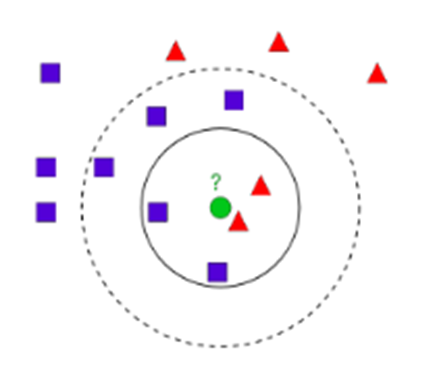


# 거리 계산
  * k-최근접 이웃을 구하기 위한 거리 계산
  * Norm
  * $𝐿_𝑝$ Norm
    * $𝐿_𝑝=(∑|𝑥|^𝑝)^(1/𝑝)$
  * $𝐿_2$ Norm
    * $𝐿_2= \sqrt{(∑𝑥^2)}=\sqrt{𝑥_1^2+𝑥_2^2+⋯+𝑛^2}$
  * 유클리드 거리(Euclidean Distance)
    * n개의 특성을 가진 두 데이터 $p$와 $q$의 차이(거리) 에 대한 $𝐿_2$  Norm
    * $𝑑𝑖𝑠𝑡(𝑝,𝑞)= \sqrt{(𝑝_1−𝑞_1 )^2+…+(𝑝_n−𝑞_n )^2 }$




# 거리 계산 예시
* $𝑑𝑖𝑠𝑡(𝑝_0,𝑞)= \sqrt{(5.1−4.9)^2+(3.5−3.0)^2+(1.4−1.4)^2+(0.2−0.2)^2 }=0.538156$
* $𝑑𝑖𝑠𝑡(𝑝_1,𝑞)= \sqrt{(7.0−4.9)^2+(3.2−3.0)^2+(4.7−1.4)^2+(1.4−0.2)^2}=4.096339$
* $𝑑𝑖𝑠𝑡(𝑝_2,𝑞)= \sqrt{(6.3−4.9)^2+(3.3−3.0)^2+(6.0−1.4)^2+(2.5−0.2)^2 }=5.338539$

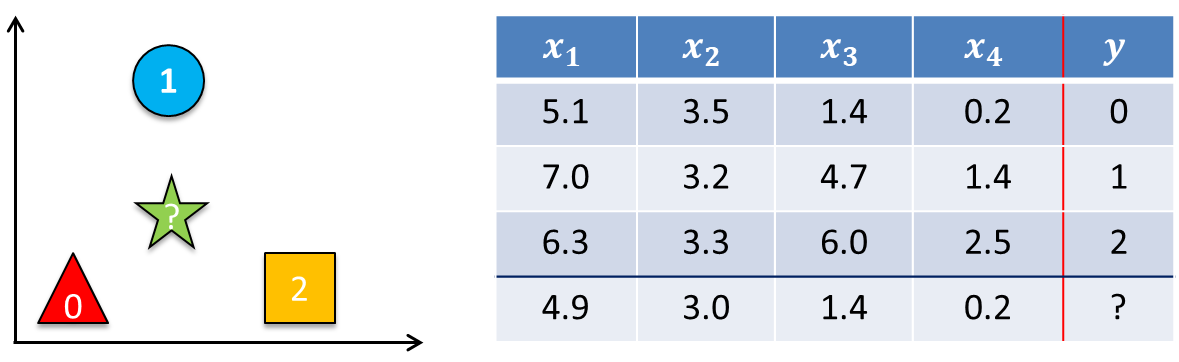


# KNN 무작위수 분류

## `np.random.uniform()`
* 무작위수 25x2 배열 두 그룹(-1 ~ 0, 0 ~ 1) 생성
  * `np.random.nuniform()`
* 무작위수를 kNN으로 학습
* 새로운 무작위 수  1x2 생성하여 분류


In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(777)


# Scikit-learn DataSet : sklearn.datasets
* make_XXX()  : 가상 데이타
  * 필요에 따라 랜덤한 숫자로 원하는 분포의 가상 데이타 생성
  * make_moons() : 태극 문양 분포의 데이타 생성
  * make_blobs() : 군집을 위한 테이터 무작위 생성
  * make_classification() : 분류를 위한 데이터 생성
* load_XXX()  : 이미 설치된 데이타
  * load_boston() : 보스턴 지역 주택가격, 회귀 용도
  * load_breast_cancer() : 위스콘신 유방암 데이터, 악성/음성 레이블, 분류 용도
  * load_diabetes() : 당뇨병 환자 데이터, 회귀 용도
  * load_digits() : 손글씨 숫자(0~9) 데이타 셋, 분류 용도
  * load_iris() : 붓꽃 품종 데이타, 분류 용도
  * load_linnerud() : 피트니스 클럽 20명 중년 남성 생리학 변수, 회귀용도
* fetch_XXX()  : 대규모 데이타 다운로드
  * fetch_mldata() : mldata.org 에서 다운로드
    * 예) mnist : fetch_mldata('MNIST original')
  * fetch_openml() : openml.org에서 다운로드
  * fetch_20newsgroups() : 20개의 뉴스 그룹 데이터
  * fetch_olivetti_faces() : 얼굴 이미지 데이터
  * fetch_rcv1() : 로이터 뉴스 말뭉치


##  `make_classification()`

> 들여쓴 블록


* make_classification() : 분류 모델에 적합한 임의의 데이터 생성 함수
  * n_samples=100 : 표본 데이터 수(건수)
  * n_features=20 : 독립 변수의 수(X 갯수)
  * n_informative=2 : 독립 변수 중 종속 변수와 상관관계가 있는 성분 수
  * n_redundant=2 : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
  * n_repeated=0 : 독립 변수 중 단순 중복된 성분의 수
  * n_classes=2 : 종속 변수의 클래스 수
  * n_clusters_per_class=2: 클래스 당 클러스터의 수
  * weights=None : 클래스 당 표본 수 비율, 예) (0.3, 0.7)
  * flip_y=0.01 : 클래스가 임의로 교환되는 샘플의 비율, 노이즈 생성
  * random_state : random seed

* sklean의 make_classficiation()함수로 변경해서 실습
* `X, y = make_classification(n_samples=50, n_features=2,n_classes=2,  n_redundant=0, random_state=0)`

In [ ]:
from sklearn.datasets import make_classification

np.random.seed(777)


# Iris 품종 분류


## Iris Raw Data, CSV
* 4가지 특징으로 붓꽃 품종 구분
  * 4가지 특징 : 꽃잎(petal)과 꽃 받침(sepal)의 폭(width)과 길이(length)
  * 품종 : setosa, versicolor, virginica
* 데이터 구하기
  * seaborn.load_dataset('iris')
  * https://github.com/mwaskom/seaborn-data
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv


In [ ]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

file_iris = 'iris.csv'
url_iris = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

with request.urlopen(url_iris) as r:
  with open(file_iris, 'wb') as f:
    f.write(r.read())

# Data Preprocessing
* 데이터가 머신 러닝에 적합한 형태가 되게 하는 작업
* Data Encoding
  * 문자형(character), 범주형(Categorical) 데이터를 숫자로 변형
  * Label encoding, Indexing
  * One-hot encoding, Vectorizing
* Scaling
  * 표준화(Standardization)
  *정규화(Normalization)


# Preprocessor Interface
* `sklearn.base.TransformerMixin()` :
  * 데이터 전처리기 기반 클래스
  * `fit(X [,y])`
    * 데이타 전처리 연산
  * `transform(X [,y])`
    * 데이터 전처리 변환
  * `fit_transform(X [,y])`
    * 데이터 전처리 연산 및 변환 동시에 수행



# LabelEncoding
* 문자형, 범주형 데이터를 숫자형 코드로 변형
* `sklearn.preprocessing.LabelEncoder`
  * `fit(label)` : encoding을 위한 class 계산
  * `code=transform(label)` : encoding 실행
  * `code=fit_transfrom(label)` : 계산과 실행을 동시에 작업
  * `label=inverse_transform(code)`: 코드를 범주 데이터로 decoding
  * `classes_` : label의 유일값, encoding 순서(index)


* LabelEncoder 선행 실습

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(["cat", "cat", "dog", "cow", "dog"])
print(enc.classes_)
label = enc.transform(["dog", "dog", "cat"])
print(label)
print(enc.inverse_transform([2, 2, 1]))


### Iris Dataset Label Encoding
* 품종 데이터 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder



# 데이타 분할
* `sklearn.model_selection`
* `X_train, X_test, y_train, y_test = train_test_split(X, y, ...)`
  * 같은 크기의 배열 2개를 지정된 비율로 나눠서 반환
  * X, y : 전체 Data set
  * `test_size=0.25 `
    * float(0.0 ~ 1.0): test dataset 비율
    * int : test dataset 갯수
  * `train_size=None` : train dataset 비율 또는 갯수
  * `random_state=None` : 정수, 난수 발생 seed
  * `shuffle=True` : 분할 전 데이터 무작위 섞기 여부
  * `stratify=None` : 층화 추출(데이터 분포 비율) 기준 컬럼

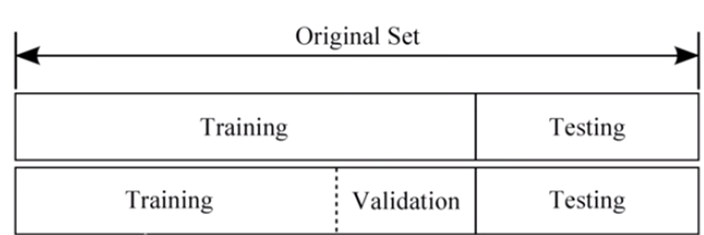

* 데이터 분할 선행 실습

In [ ]:
from sklearn.model_selection import  train_test_split

X = np.arange(10)
y = X * X
print('X:', X, 'y:', y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print("X_train", X_train)
print("y_train", y_train)
print("X_test", X_test)
print("y_test", y_test)

## Iris Raw Data 데이터 분할 후 분류 실습

In [ ]:
from sklearn.model_selection import  train_test_split

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']


# scikit-learn Dataset


## sklearn 제공 정제 데이타 : load_XXX()
* `load_boston()` : 보스턴 지역 주택가격, 회귀 용도
* `load_breast_cancer()` : 위스콘신 유방암, 2진 분류 용도
* `load_diabetes()` : 당뇨병 환자 데이터, 회귀 용도
* `load_digits()` : 손글씨 숫자(0~9) 데이타 셋, 다중 분류 용도
* `load_iris()` : 붓꽃 품종 데이터, 다중 분류 용도
* `load_linnerud()` : 피트니스 클럽 중년 남성 20명 생리학 변수, 회귀 용도


## sklearn.utils.Bunch : 샘플 데이터 보관하는 자료구조
* key-value 쌍, 파이썬 딕셔너리와 유사한 구조
* keys() : 키 목록 반환
* 공통 key
  * 'data' : 샘플 데이타, NumPy 배열
  * 'target' : 레이블 데이타, NumPy 배열
  * 'target_names' : 레이블 클래스 이름과 의미
  * 'feature_names' : 샘플 데이타 특성 이름, 컬럼 이름
  * 'DESCR' : 데이타 셋에 대한 전체 설명
  * 'filename' : 데이타 저장 파일 위치, csv
* 데이터 접근
  * obj['key'] 또는 obj.key


## Iris(붓꽃) 데이터
* sklearn.datasets.load_iris()
* 4가지 특징으로 품종 구분
  * 4가지 특징 : 꽃잎(petal)과 꽃 받침(sepal)의 폭(width)과 길이(length)
  * 품종 : setosa, versicolor, virginica


In [ ]:
from sklearn.datasets import load_iris


* type()

* keys()

* DESCR

* data

* data.shape

* feature_names

* target

* target.shape

* target_names

* DataFrame으로 생성

In [ ]:
import pandas as pd



## Iris KNN 품종 분류 실습

* iris 데이타를 knn으로 train 데이터 학습
* test 데이터 예측
* test accuracy 계산

* probability

# 분류 평가 지표

### 정확도(Accuracy)
* 실제 데이터와 예측 데이터가 얼마나 같은지 판단
  * $정확도(Accuracy) = \frac{예측과 실제가 동일한 건수(맞힌수)}{전체 예측 건수}$
  * 0 ~ 1, 백분율
  * 샘플이나 테스트 데이터가 불균형한 경우 낮은 신뢰성
    * 보완적인 평가 지표 요구
* `model.score(X, y)`
* `skelarn.metrics.accuracy_score(actual, pred)`


In [ ]:
from sklearn.metrics import accuracy_score



## 오차 행렬
* 모델이 헷갈리는(confused) 정도
* 실제/예측, True/False, Negative/Positive 교차 행렬
* TN (True Negative) : Negative로 예측, 맞음(실제 Negative)
* FP (False Positive) : Positive로 예측, 틀림(실제 Negative)
* FN (False Negative) : Negative로 예측, 틀림(실제 Positive)
* TP (True Positive) : Positive로 예측, 맞음(실제 Positive)
* `sklearn.metrics.confusion_matrix(test_y, pred)`
  * return : 𝐶𝑖,𝑗 (n_classes, n_classes)
    * i : actual
    * j : predicted

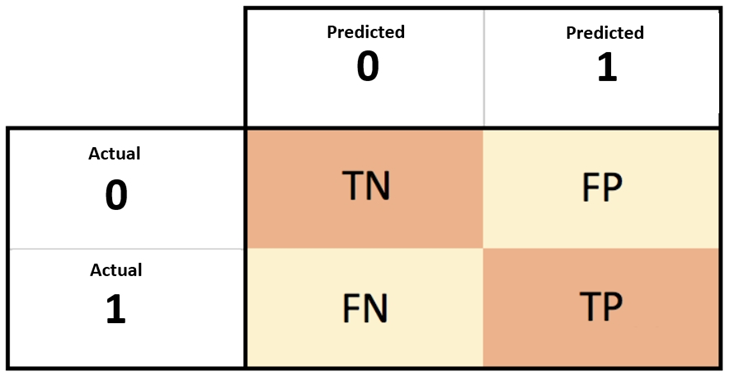

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)}')
print(confusion_matrix(y_true, y_pred))

In [ ]:
y_true = np.array([1,0,2,0,1,2,0,1,2,0,2,1])
y_pred = np.array([1,0,2,1,2,1,0,1,2,0,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)}')
print(confusion_matrix(y_true, y_pred))

## 다중 클래스 오차 행렬의 TP, FP, FN, TN
* Class A
  * TP:9
  * FP:3 = 1 + 2
  * FN:1 = 1+ 0
  * TN:17 = 8+1+1+7
* Class B
  * TP:8
  * FP:2 = 1+1
  * FN:2 = 1+1
  * TN:18 = 9+0+2+7
* Class C
  * TP:7
  * FP:1 = 1+0
  * FN:3 = 2+1
  * TN:19 = 9+1+1+8

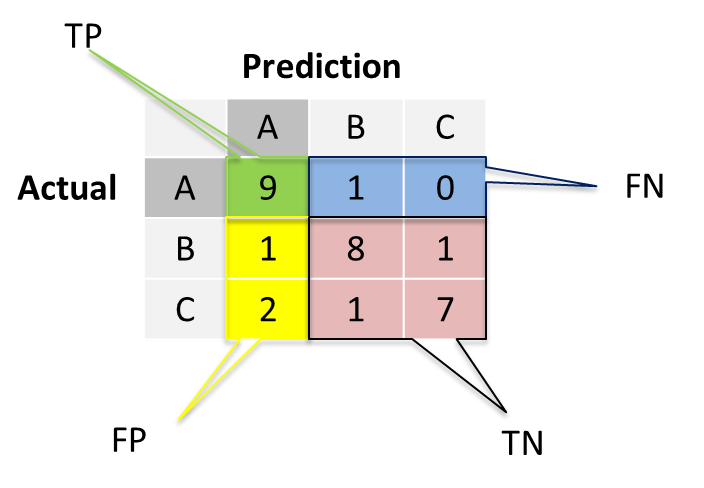


## 정밀도, 재현율

### 정밀도(Precision) = TP / (TP + FP)
* Positive로 예측한 전체 건수 중에 옳게 예측한 건수의 비율
* Positive 예측이 얼마나 정밀한가를 측정하는데 초점을 둔 지표
* 양성 예측도
* 중요 사례
    * 스팸 분류 : 스팸으로 분류한 메일 중에 중요 메일이 있는 경우
* `sklearn.metric.precision_score()`
* 정밀도 사람 탐지 사례
  * thresh=75, 1/1=1
  * thresh=50, 2/2=1
  * thresh=25, 2/3=0.6666
  * thresh=10, 2/4=0.5

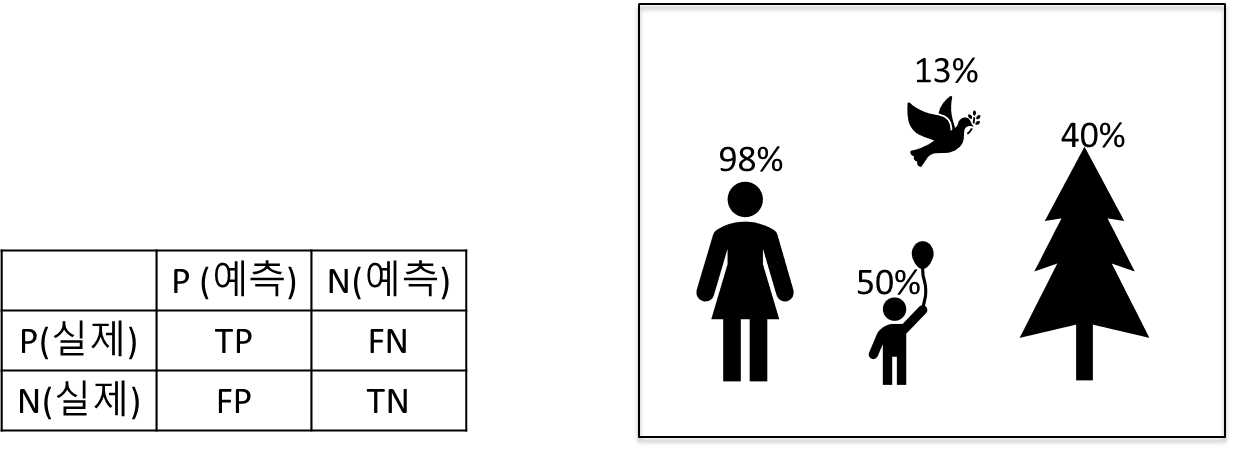

### 재현율(Recall) = TP / (TP + FN)
* 실제 Positive인 건수 중에 Positive로 옳게 예측한 건수의 비율
* TPR(True Positive Rate), 민감도(sensitivity)
* 중요 사례
  * 암 진단 : 암 환자를 건강으로 분류하는 경우
* `sklearn.metrics.recall_score()`
* 재현율 사람 탐지 사례
  * thresh=75, 1/2=0.5
  * thresh=50, 2/2=1
  * thresh=25, 2/2=1
  * thresh=10, 2/2=1

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = np.array([0,0,0,0,0,1,1,1,1,1])
y_pred = np.array([0,0,0,0,1,0,1,1,1,1])






print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

## F1 스코어
* 정밀도와 재현율은 Trade-off 관계
* 한쪽으로 치우치면 낮아지는 성능
* 재현율과 정밀도의 균형을 나타내는 수치 요구
* Harmonic Mean
  * $F1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}} = 2\frac{precision\times recall}{precision+recall}$

* `sklearn.metrics.f1_score(y_true, y_pred)`
* `sklearn.metrics.classification_report(y_true, y_pred)`
  * 모든 분류 지표를 한번에 출력


In [ ]:
# F1 예 precision:0.5, recall:0.5
2* (0.5*0.5)/(0.5+0.5)

In [ ]:
# F1 예 precision:0.9, recall:0.1
2* (0.9*0.1)/(0.9+0.1)

In [ ]:
from sklearn.metrics import f1_score, classification_report

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]

for y_pred in [y_pred1, y_pred2]:
    print(confusion_matrix(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'accuracy:{accuracy}, precision:{precision},\
                       recall:{recall}, f1: {f1}')
    print(classification_report(y_true, y_pred))

## ROC, AUC
* ROC(Receiver Operation Characteristic) Curve
  * 수신자 판단 곡선
  * FPR(X축) 와 TPR(Y축)의 변화량 곡선
    * TPR(True Positive Rate) : 재현률, TP / (TP + FN)
    * FPR(False Positive Rate) : FP / (TN+ FP)  = 1- TNR
    * TNR(True Negative Rate) : = TN / (TN+ FP)
  * 대각 직선이 가장 낮은 성능, 무작위 확률 성능
    * AUC : 0.5
* AUC(Area Under Curve)
  * ROC 곡선 아래의 면적
  * 1에 가까울 수록 좋다.
* `sklearn.metrics`
  * `fpr, tpr, thresh = roc_curve(y_true, y_pred)`
  * `score = roc_auc_score(y_true, y_pred)`
  * `score = auc(fpr, tpr)`

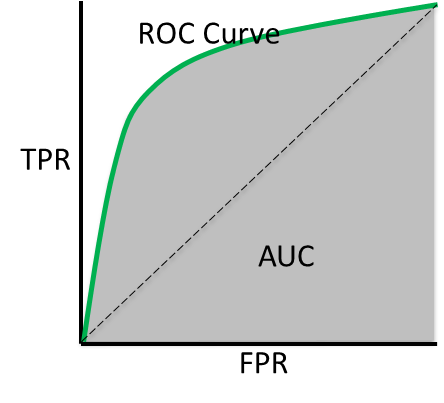

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]


### 위스콘신 유방암 데이터
* 환자 종양의 특성에 따른 악성/양성 분류
* `load_breast_cancer()`
* 데이터 건수 : 569
* Feature 개수 : 30(세포 특징 10개의 특성 마다 mean, standard error, worst 반복)
  * radius : 반경
  * texture : 질감
  * perimeter : 둘레
  * area : 면적
  * smoothness : 매끄러움(반경 길이의 국소적 변화)
  * compactness : 조그만 정도( (둘레*둘레)/면적 – 1)
  * concavity : 오목함
  * points : 오목한 점의 수
  * symmetry : 대칭
  * fractal dimension : 프랙탈 차원(해안선근사 -1)
* class :  0=Malignant(악성) : 212건, 1=Benign(양성) :357건




In [ ]:
from sklearn.datasets import load_breast_cancer



In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



### 예측 확률로 ROC 실습
* `knn.predict_proba(X_test)`

### Best Threshold
```python
best_idx = np.argmax(tpr - fpr)
best_thresh = thresh[best_idx]
```

### Multi-Class ROC

In [ ]:
from sklearn.metrics import auc, roc_curve

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)


# Scaling
* 표준화(Standardization), 정규화(Normalization)
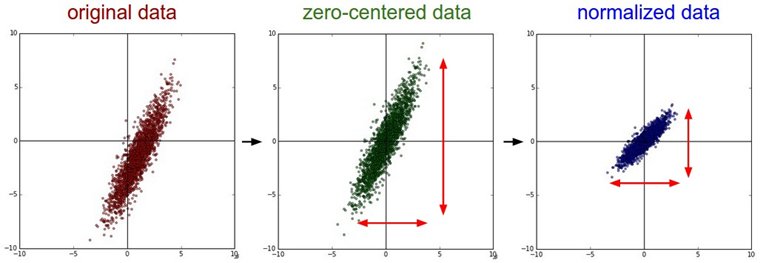

# 표준화(Standardization)
* $𝑥_{𝑛𝑒𝑤}=  \frac{𝑥 −𝜇}{𝜎}  $
* 서로 다른 분포의 특징 값을 동일한 표준 정규 분포로 통일
  * 표준 정규분포 : 평균(𝜇)이 0이고 표준편차(𝜎)가 1인 정규 분포
  * 평균(Mean) : $𝜇= \frac{𝑥_1+ 𝑥_2+ … 𝑥_𝑛}{𝑛}$
    * 각각의 특성(지역성)을 고려하지 않고 전체를 대표(전역성) 하는 하나의 값
  * 분산(Variation) : $𝜎^2= \frac{(𝑥_1−𝜇)^2+(𝑥_2  −𝜇)^2+ …+(𝑥_𝑛−\mu)^2}{𝑛}$
    * 각각의 특징 값이 평균과의 차이에 제곱해서 평균을 낸 값
    * 각각이 특징과 평균과의 차이를 표현
    * 음수 값에 대한 누적은 상쇄 효과가 날 수 있기 때문에 제곱
    * 각 특성 값의 지역적 특성과 전역적 특성의 차이를 나타내는 지표
  *표준편차(Standard Deviation) :   $𝜎= \sqrt{𝜎^2}= \sqrt{\frac{(𝑥_1−𝜇)^2+(𝑥_2  −𝜇)^2+ …+(𝑥_𝑛−\mu)^2)}{𝑛}}$
    * 분산에서 사용한 제곱을 제곱근으로 상쇄

* `sklearn.preprocessing.StandardScaler()`
  * `mean_`, `var_`, `scale_`


## 임의의 수 표준화 실습
* `[2,8,10]`
* 표준화 계산
* StandarsScaler 실습

In [ ]:
arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
m, v, s = arr.mean(), arr.var(), arr.std()
print(f'mean:{m}, var:{v}, std:{s}')
print(f'maen:{arr.sum()/3}, var:{np.sum((arr-m)**2)/3}, std:{np.sqrt(v)}')
print((arr-m)/s)

scaler = StandardScaler()
scaler.fit(arr)
print(f'mean:{scaler.mean_}, var:{scaler.var_}, std:{scaler.scale_}')
print(scaler.transform(arr))

## Iris 데이터 표준화 실습
* iris 0,1 feature 표준화 및 시각화

In [ ]:
iris = load_iris()
data = iris.data

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()



## 표준화의 필요성

* 두 품종의 물고기 길이와 두께 데이터
* 초록색 별표 분류
* `x = np.load('standard.npy')`
* `y = np.concatenate((np.ones(35), np.zeros(14)))`

In [ ]:
x = np.array([
       [  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  11.8,    9.9],
       [  12. ,    9.8],
       [  12.2,   12.2],
       [  12.4,   13.4],
       [  13. ,   12.2],
       [  14.3,   19.7],
       [  15. ,   19.9]])

y = np.concatenate((np.ones(35), np.zeros(14)))
newb = np.array([[25, 150]])

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x, y)
knn.predict(newb)

In [ ]:
dist, idx = knn.kneighbors(newb)
print(dist, idx)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')
plt.plot(x[idx,0], x[idx,1], 'go');

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(x)
x_t = std.transform(x)

sns.scatterplot(x=x_t[:, 0], y=x_t[:, 1], hue=y)
newb_t = std.transform(newb)
plt.plot(newb_t[0,0], newb_t[0,1], 'g*')

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_t, y)
knn2.predict(newb_t)

# 정규화(Normalization)
* 서로 다른 규모의 특징 값을 같은 규모(단위)로 통일
* 모든 특징 값을 0 ~ 1 사이로 변환
  * $𝑥_{𝑛𝑒𝑤}=  \frac{𝑥 −min⁡(𝑥)}{max⁡(𝑥)−min⁡(𝑥)} $

* `sklearn.preprocessing.MinMaxScaler(feature_range)`
  * `feature_range = (0,1)`
    * 정규화 목표 구간,   Tuple(min, max)
  * data_min_, data_max_


## MinMaxScaler

* `[2,8,10]`
* min max 정규화 계산
* MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f"before:{arr}")
min, max = arr.min(), arr.max()
print(f'min:{min}, max:{max}')
scaled1 = (arr - min)/(max - min)
print(f"scaled:{scaled1}")

mm_scaler = MinMaxScaler()
mm_scaler.fit(arr)
print(f'min:{mm_scaler.data_min_}, max:{mm_scaler.data_max_}')
scaled2 = mm_scaler.transform(arr)
print(f"scaled:{scaled2}")

* iris 0,1 feature 정규화 및 시각화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
data = iris.data

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()



## Iris 표준화 후 kNN 분류 실습

* iris 데이터 표준화 후 학습 및 평가

# Pipeline
* 전처리 단계와 학습 모델을 하나의 객체로 처리
* `sklearn.pipeline.Pipeline(steps, memory, verbose)`
  * `steps` : list of tuple
    * (name, object)
  * `named_steps`



In [ ]:
from sklearn.pipeline import Pipeline

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

std_scaler = StandardScaler()
knn = KNeighborsClassifier()


In [ ]:
pipe.steps

In [ ]:
pipe.named_steps

In [ ]:
pipe[1], pipe['knn']

In [ ]:
pipe.set_params(knn__n_neighbors=1)

# 손글씨 숫자 분류
* 사람 손으로 쓴 숫자(0~9)
* 전체 샘플 건수 : 1,797
* 각 이미지 크기 : 8 x 8,  각 픽셀 값 범위 : 0~16


* 첫 번째 숫자만 **표시**

* 최대최소 정규화 적용
* 훈련 세트와 테스트 세트 분류
* `n_neighbors`를 1~11로 변경하면서 학습 및 평가

# 교차 검증(Cross Validation)
* 무작위로 뒤섞은 Train, Test Set은 실행 할 때 마다 다른 평가 결과를 가져온다.
* Train Set과 Test Set의 역할을 바꾸어 모든 Data Set에 역할을 교차 수행
* Total Data Set = Train + Validation + Test
* 여러 세트로 구성된 학습 데이터 세트와 검증 세트로 학습과 평가 수행
* 과적합 방지, 파라미터 튜닝


## KFold
* 가장 보편적인 교차 검증 기법
* k개의 데이터 폴드 세트 생성
* k 번 만큼 각 폴드 세트 검증 평가 반복
* `sklearn.model_selection.KFold(n_splits, shuffle, random_state)`
  * `n_splits=5` : 폴드의 갯수, 최소 2이상
  * `shuffle=False` : 폴드 나누기 전 뒤섞기 여부
  * `random_state=None` : shuffle=True 인 경우 random seed
* `split(X [,y, groups])` : 폴드에 포함할 index 반환



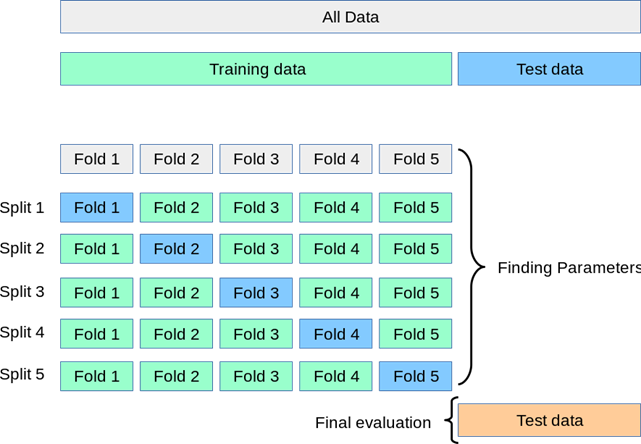


* `np.arange(0.0, 1.5, 0.1)`를 `KFold(3)`으로 분할

In [ ]:
from sklearn.model_selection import KFold

x = np.arange(0.0, 1.5, 0.1)


* Imbalanced Data Set KFold 실습
  * y의 값의 균형이 0:10개, 1:5개
  * shuffle 을 해도 Train, Test 간의 불 균형


In [ ]:
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

kfold = KFold(3, shuffle=True)
for train, test in kfold.split(x):
  print(y[train], y[test])

##  Stratified K-Fold
  * 불균형한 분포를 갖는 레이블 *데이터*
* `sklearn.model_selection.StratifiedKFold(n_splits, shuffle, random_state)`
  * imbalanced data set의 폴드를 균형있게 분할



In [ ]:
from sklearn.model_selection import StratifiedKFold

x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

skfold = StratifiedKFold(n_splits=5, shuffle=True)
for train, test in skfold.split(x, y):
  print(y[train], y[test])

## Cross Validation 실습
* 손글씨 data KFold(5)로 kNN 학습 및 평가

In [ ]:
digits = load_digits()
kfold = KFold(n_splits=5)



### cross_val_score
* `sklearn.model_selection`
  * `cross_val_score(estimator, X, y, groups, scoring, cv=5, ...)`
    * scoring:  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    * KFold 수행 결과를 점수로 반환하는 함수
  * cross_validate(estimator, X, y, groups, scoring, cv=5, ...)
    * 여러 평가지표를 한꺼번에 출력


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

knn = KNeighborsClassifier(n_neighbors=1)



# 최적의 파라미터 찾기
* `n_neighbors` 값을 바꾸어 가며 `cross_val_score()`를 여러 번 실행
  * `n_neighbors` = 1~11
  * cross validation = 5
* 가장 좋은 성능을 나타내는 파라미터 값 찾기


In [ ]:
best = (0,0)


## GridSearchCV
* 최적의 파라미터 튜닝
* `obj = sklearn.model_selection.GridSearchCV(estimator, param_grid, cv, ...)`
  * `estimator` : estimator object
  * `param_grid` : dict
    * `estimator` 튜닝을 위해 시도할 파라미터 이름과 값
  * `cv` : cross validation에 사용할 Fold 수, 또는 KFold 객체
* `obj.cv_results_` : GridSearch 결과
  * 출력이 복잡하므로 Pandas DataFrame 활용
* `obj.best_params_` : 최적의 파라미터
* `obj.best_estimator_` : 최적의 파라미터로 학습된 모델


* GridSearchCV, knn으로 최적의 n_neighbors 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)



## Pipeline + GridSearch
* Minmax Scaler 적용
* `param_grid` prefix : name__


In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mm_scaler', mm_scaler), ('knn', knn)])



In [ ]:
estimator

# RandomSearch
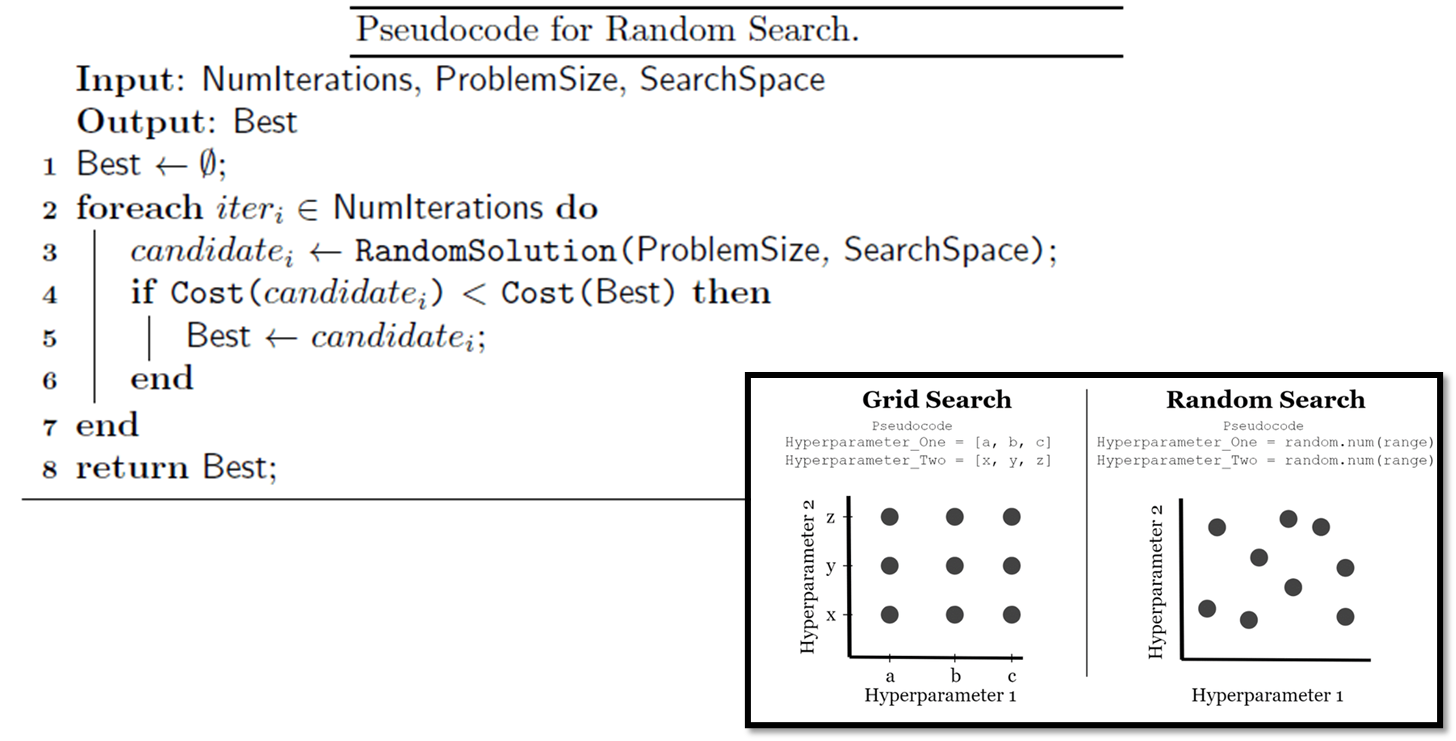

## RandomSearchCV
* `obj = sklearn.model_selection.RandomizedSearchCV()`
  * `estimator`
  * `param_distributions`
  * `n_iter`
  * `cv`
* `obj.cv_results_` : GridSearch 결과
  * 출력이 복잡하므로 Pandas DataFrame 활용
* `obj.best_params_` : 최적의 파라미터
* `obj.best_estimator_` : 최적의 파라미터로 학습된 모델


* RandomizeSearchCV + Pipe
  * kNN 숫자 손글씨 분류

In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mm_scaler', mm_scaler), ('knn', knn)])



In [ ]:
estimator

# 모델 저장 및 복원

* 최적의 모델 저장
 *  `model.dat`

In [ ]:
import pickle

with open('model', 'wb') as f:
  pickle.dump(estimator, f)


In [ ]:
with open('model', 'rb') as f:
  model = pickle.load(f)

model.score(X_test, y_test)

### 손으로 쓴 숫자 인식하기
* 온라인 그림판 : https://sketch.io/sketchpad/
* 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

url = url = 'https://raw.githubusercontent.com/dltpdn/img2data/master/0458.png'

with request.urlopen(url) as r:
    with open('number.png', 'wb') as f:
      f.write(r.read())

*  img2data 모듈 설치

In [ ]:
!pip install img2data --proxy 70.10.15.10:8080

In [ ]:
import img2data
import cv2

image = cv2.imread('number.png')
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (8,8), reshape=True)
for i, n in enumerate(numbers):
    n = n/n.max() * 16 # 0~255 구간을 0~16구간으로 변경
    y_pred = model.predict(n)

    plt.subplot(1, len(numbers), i+1)
    plt.title(y_pred[0])
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")

# 알고리즘 선택
https://scikit-learn.org/stable/tutorial/machine_learning_map/
![](https://scikit-learn.org/stable/_static/ml_map.png)